# Read data

In [1]:
filename = "/home/administrator/Documents/dataset-eeg/sesja2_pawel_zaciskanie_dloni.bdf"

In [2]:
import matplotlib.pyplot as plt

from Utilities.converter import FileConverter

signals, markers = FileConverter().preconvert_file(filename)

# Running mean on signals

In [3]:
import numpy as np

freq = FileConverter.DATASET_FREQ
mean_window = freq * 3

In [4]:
signals_mean = []
for s in signals:
    s = (s - np.min(s)) / (np.max(s) - np.min(s))
    signals_mean.append(s)

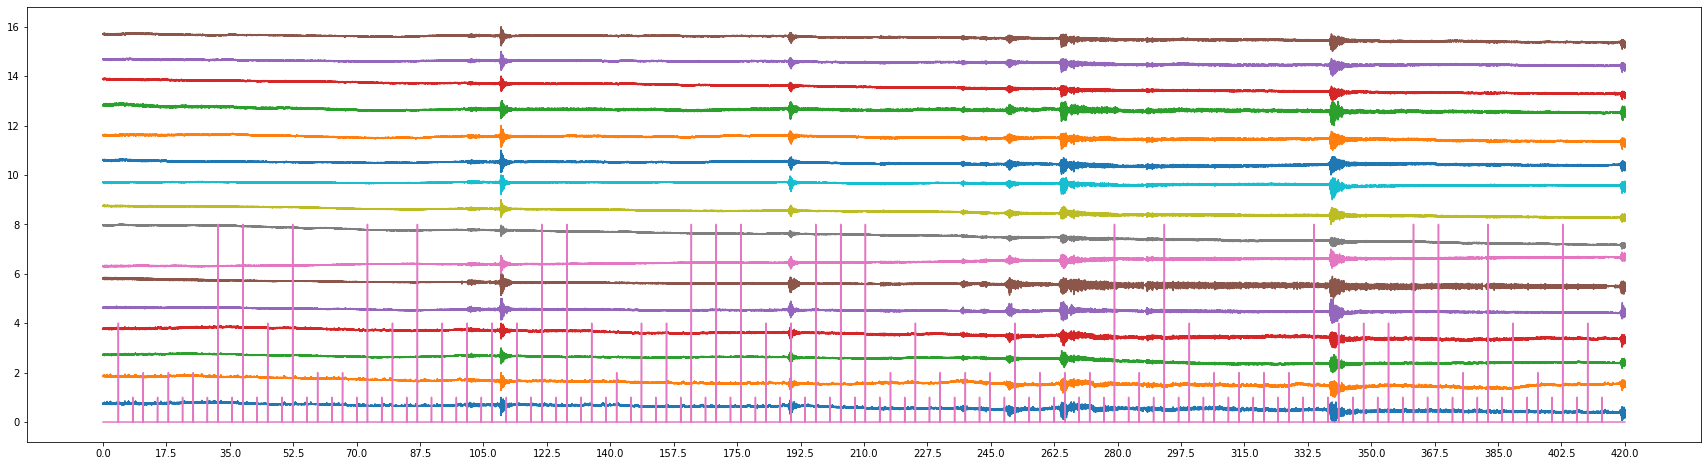

In [5]:
signal_samples = np.array(signals_mean)

fig, ax = plt.subplots()

fig.set_size_inches(30,8)

for i, s in enumerate(signal_samples):
    ax.plot(np.linspace(0, 7*60, num=len(s)), s+i)
    
ax.plot(np.linspace(0, 7*60, num=len(markers)), markers)

ax.set_xticks(np.linspace(0, 7*60, num=25))

plt.show()

# Slice data

In [6]:
impulses_names = ["BREAK", "LEFT", "RIGHT", "RELAX"]

type_of_slice = None
slicing = False
slice_start_index = None

all_slices = []
for i in range(len(markers)):
    m = markers[i]
    
    if not slicing:
        if m > 1:
            slicing = True
            slice_start_index = i
            type_of_slice = int(np.log2(m))
        else:
            continue
            
    else:
        if m == 1:
            current_slice = signal_samples[:, slice_start_index:i]
            
            all_slices.append({
                "impulse_name": impulses_names[type_of_slice],
                "impulse_signal": current_slice,
                "duration_s": (i - slice_start_index) / freq
            })
            
            slicing = False
            slice_start_index = None
            type_of_slice = None
        else:
            continue

In [7]:
import os

bn = os.path.basename(filename)[:-4]
savepath = os.path.join("dataset", bn)

if not os.path.exists(savepath):
    os.makedirs(savepath)

In [8]:
plt.figure(figsize=(10, 5), dpi=100)

for i, impulse in enumerate(all_slices):
    name = impulse["impulse_name"]
    signal = impulse["impulse_signal"]
    duration = impulse["duration_s"]
    
    data_filename = os.path.join(savepath, f"{i}.npy")
    np.save(data_filename, impulse)

    for j, s in enumerate(signal):
        plt.title(name)
        plt.plot(np.linspace(0, duration, num=len(s)), s+j)

    fig_filename = os.path.join(savepath, f"{i}.jpg")
    plt.savefig(fig_filename, dpi=100)
    
    plt.clf()

<Figure size 1000x500 with 0 Axes>

In [9]:
test = np.load(os.path.join(savepath, f"0.npy"), allow_pickle=True)
test

array({'impulse_name': 'RIGHT', 'impulse_signal': array([[0.74765897, 0.75407284, 0.7574158 , ..., 0.74454254, 0.74570584,
        0.74447465],
       [0.8375885 , 0.83922726, 0.84266186, ..., 0.8428377 , 0.8439642 ,
        0.84151375],
       [0.71713513, 0.7166665 , 0.71721876, ..., 0.742502  , 0.74173063,
        0.7403587 ],
       ...,
       [0.8600876 , 0.86279106, 0.86818343, ..., 0.87163943, 0.8735313 ,
        0.87557834],
       [0.66410446, 0.66746944, 0.67431134, ..., 0.68897635, 0.68735886,
        0.6853921 ],
       [0.6861972 , 0.68956363, 0.69419897, ..., 0.7288469 , 0.7265272 ,
        0.7248915 ]], dtype=float32), 'duration_s': 4.140625},
      dtype=object)